In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data sets/Food data.csv')
df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
1817,1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [ ]:
df.shape

(1822, 11)

In [ ]:
df.describe()

,ID,meals_served,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1790.000000,1822.000000,1806.000000,1822.00000,1806.000000
mean,910.500000,373.512849,22.189280,60.791257,3.01427,26.997534
std,526.110413,494.791973,8.919939,17.326232,2.00899,12.791891
min,0.000000,100.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,211.250000,15.684259,46.035158,1.00000,15.990760
50%,910.500000,306.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,407.000000,28.807494,75.789317,5.00000,38.116308
max,1821.000000,4730.000000,60.000000,89.982828,6.00000,49.803703


In [ ]:
df.tail()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
1817,1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT
1821,1821,5/10/2024,350.0,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables


In [ ]:
df.head(4)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt


In [ ]:
df.describe()

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000
mean,910.500000,372.327113,11.911087,22.189280,60.798665,3.01427,26.996085
std,526.110413,490.505492,4.269452,8.919939,17.250127,2.00899,12.735579
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,212.250000,8.000000,15.684259,46.137537,1.00000,16.148956
50%,910.500000,306.000000,12.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,405.750000,15.000000,28.807494,75.755784,5.00000,37.978663
max,1821.000000,4730.000000,19.000000,60.000000,89.982828,6.00000,49.803703


**`Exploratory Data Analysis (EDA)`**

**Converting date to datetime**

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df['staff_experience']

,staff_experience
0,intermediate
1,NaN
2,Beginner
3,Beginner
4,Intermediate
...,...
1817,Intermediate
1818,intermediate
1819,Intermediate
1820,EXPERT


**Checking For the Missing-Values in Staff-Experience.**


In [ ]:
df['staff_experience'].isnull().sum()

np.int64(337)

**337 Missing values in Staff Experience , now we take mode of staff-experience.**

In [ ]:
df["staff_experience"].mode()

,staff_experience
0,Beginner


**Replacing the missing values with mode(beginner)**


In [ ]:
df['staff_experience'].fillna('mode', inplace=True)

**Replaced the missing values with mode now again checking for missing values left.**


In [ ]:
df['staff_experience'].isnull().sum()

np.int64(0)

**No missing values in staff-expericence  now.**


**Now performing operations on Waste_Category**

In [ ]:
df['waste_category']

,waste_category
0,dairy
1,MeAt
2,MeAt
3,MeAt
4,MEAT
...,...
1817,GRAINS
1818,dairy
1819,MeAt
1820,MEAT


In [ ]:
df['waste_category'] = df['waste_category'].str.strip().str.lower()

**Checking for Missing Values in Waste_catageory.**

In [ ]:
df['waste_category'].isnull().sum()

np.int64(21)

In [ ]:
df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)


In [ ]:
df['waste_category'].isnull().sum()

np.int64(0)

In [ ]:
df['special_event']

,special_event
0,0
1,0
2,0
3,0
4,0
...,...
1817,0
1818,0
1819,0
1820,0


In [ ]:
df['special_event'].isnull().sum()

np.int64(0)

In [ ]:
df['meals_served']

,meals_served
0,196.0
1,244.0
2,148.0
3,157.0
4,297.0
...,...
1817,395.0
1818,483.0
1819,243.0
1820,406.0


In [ ]:
df['meals_served'].isnull().sum()

np.int64(32)

**Filling missing values with median for skewed numeric columns.**

In [ ]:
df['meals_served'].fillna(df['meals_served'].median(), inplace=True)

In [ ]:
df['meals_served'].isnull().sum()

np.int64(0)

**Now on Past_waste_kg**

In [ ]:
df['past_waste_kg']

,past_waste_kg
0,7.740587
1,42.311779
2,41.184305
3,41.543492
4,26.525097
...,...
1817,40.550668
1818,36.470276
1819,19.767203
1820,28.560361


In [ ]:
df['past_waste_kg'].isnull().sum()


np.int64(16)

In [ ]:
df['past_waste_kg'].fillna(df['past_waste_kg'].median(), inplace=True)

In [ ]:
df['past_waste_kg'].isnull().sum()

np.int64(0)

**Now on humidity_percent**

In [ ]:
df['humidity_percent']

,humidity_percent
0,45.362854
1,64.430475
2,69.046113
3,46.292823
4,79.741064
...,...
1817,45.138435
1818,59.485091
1819,70.508404
1820,55.286642


In [ ]:
df['humidity_percent'].isnull().sum()

np.int64(16)

In [ ]:
df['humidity_percent'].fillna(df['humidity_percent'].median(), inplace=True)

In [ ]:
df['humidity_percent'].isnull().sum()

np.int64(0)

**Now on Kitchen_Staff**

In [ ]:
df['kitchen_staff']

,kitchen_staff
0,13
1,15
2,16
3,19
4,10
...,...
1817,18
1818,11
1819,11
1820,10


In [ ]:
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')

In [ ]:
df['kitchen_staff'].isnull().sum()

np.int64(18)

**Converting Kitchen-Staff to numeric to counter the eerors to Nan**

In [ ]:
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')


**Now filling values with median**

In [ ]:
df['kitchen_staff'] = df['kitchen_staff'].fillna(df['kitchen_staff'].median())

In [ ]:
df['kitchen_staff'].isnull().sum()

np.int64(0)

In [ ]:
df.describe()

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000
mean,910.500000,372.327113,11.911087,22.189280,60.798665,3.01427,26.996085
std,526.110413,490.505492,4.269452,8.919939,17.250127,2.00899,12.735579
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,212.250000,8.000000,15.684259,46.137537,1.00000,16.148956
50%,910.500000,306.000000,12.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,405.750000,15.000000,28.807494,75.755784,5.00000,37.978663
max,1821.000000,4730.000000,19.000000,60.000000,89.982828,6.00000,49.803703


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1822 non-null   float64
 3   kitchen_staff     1822 non-null   float64
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1822 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1822 non-null   float64
 9   staff_experience  1822 non-null   object 
 10  waste_category    1822 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 156.7+ KB


**Checking for all the Missing values in all coloumns.**

In [ ]:
print(df.isnull().sum())

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
dtype: int64


[Visualizing Distributions](https://)

**Visualize Remaining Missing Data (Heatmap)**

In [ ]:
sns.set(style="whitegrid")

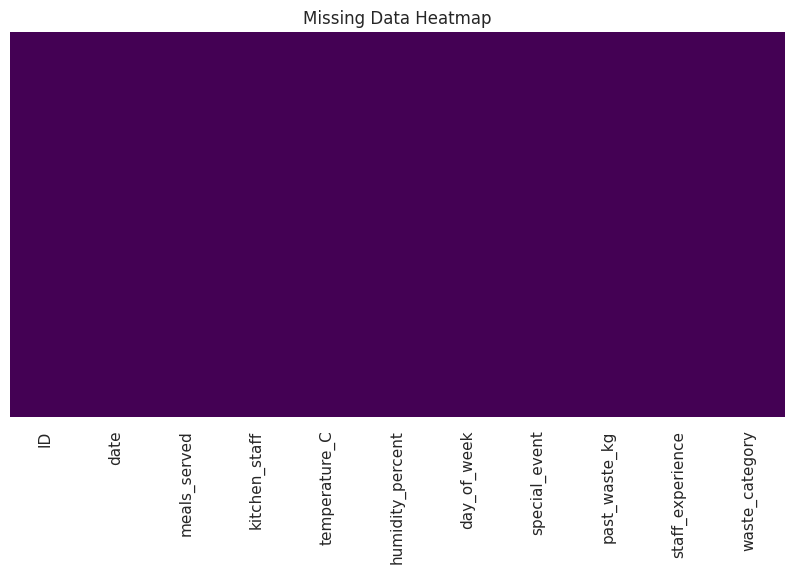

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

**Visualize Distribution of Numeric Features.**

**We use histogram for numeric values.**

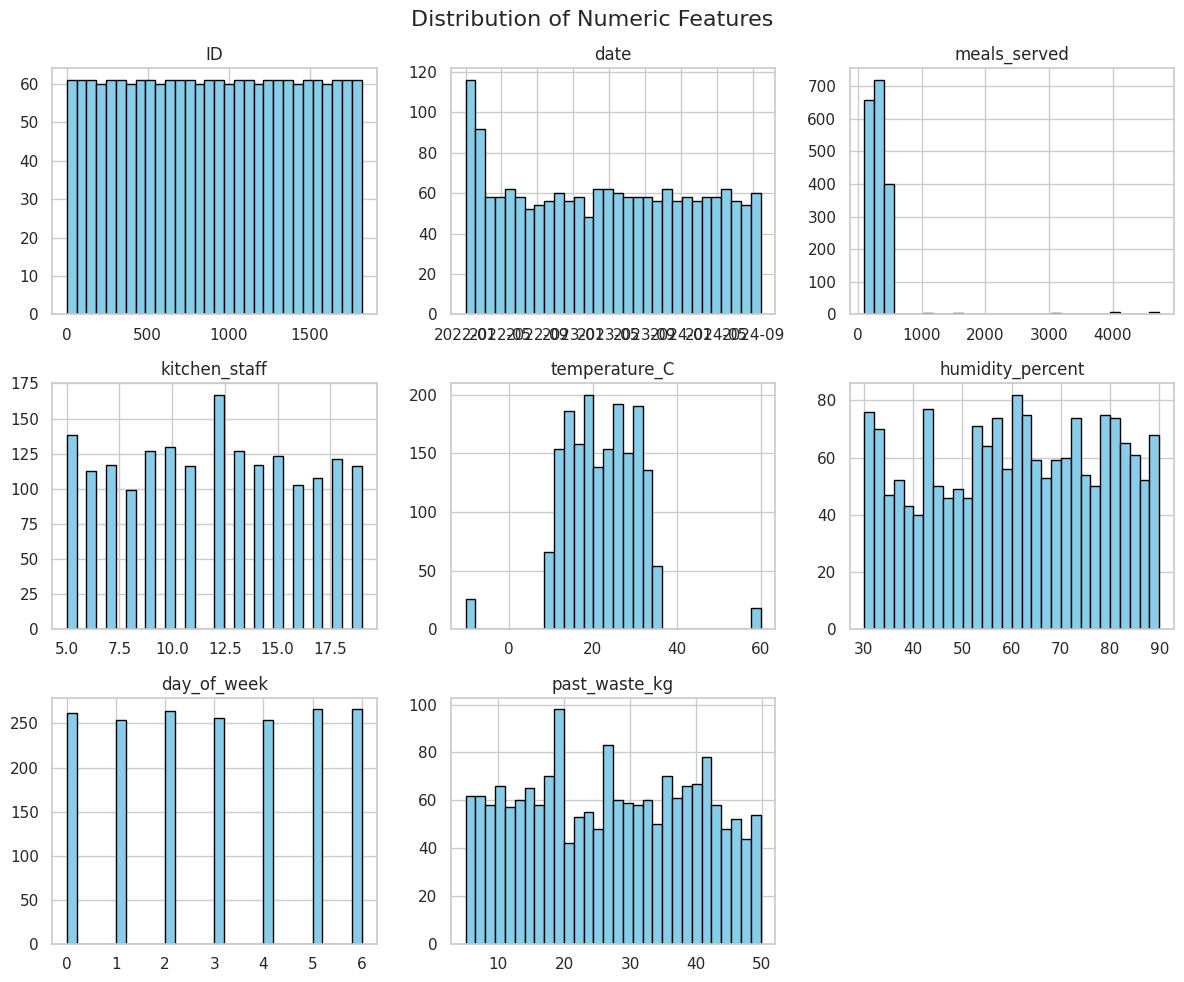

In [ ]:
df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

**Now we Will work on Outliers through boxplot for skewed numeric columns**

In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

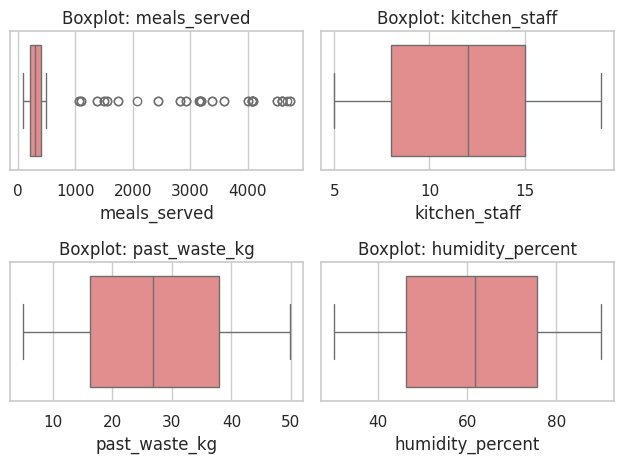

In [ ]:
numeric_cols = ['meals_served', 'kitchen_staff', 'past_waste_kg', 'humidity_percent']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

**Now we will use count plot for Categorical features**

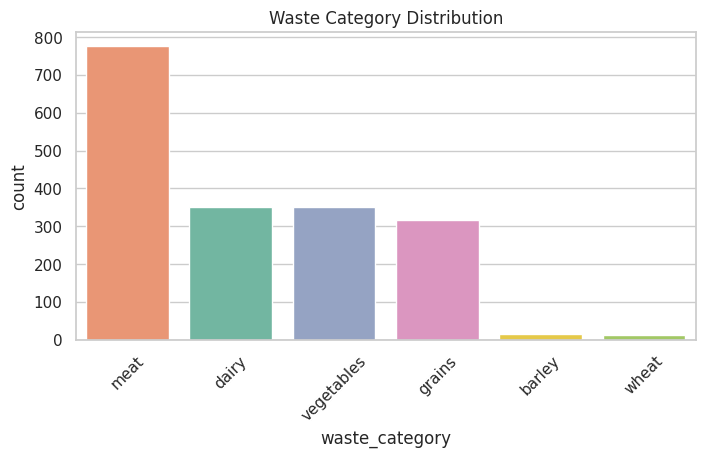

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(
    x='waste_category',
    hue='waste_category',  # assign hue same as x
    data=df,
    order=df['waste_category'].value_counts().index,
    palette='Set2',
    legend=False)
plt.title("Waste Category Distribution")
plt.xticks(rotation=45)
plt.show()

**Using Count plot for 'staff_experience'.**

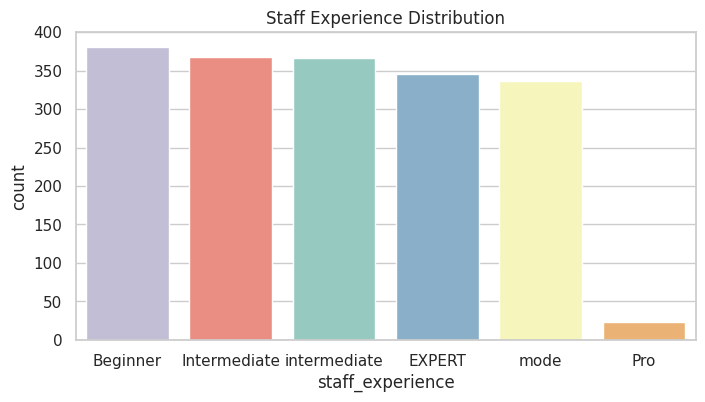

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(
    x='staff_experience',
    hue='staff_experience',
    data=df,
    order=df['staff_experience'].value_counts().index,
    palette='Set3',
    legend=False)
plt.title("Staff Experience Distribution")
plt.show()

**Using Count plot for 'special_event'.**

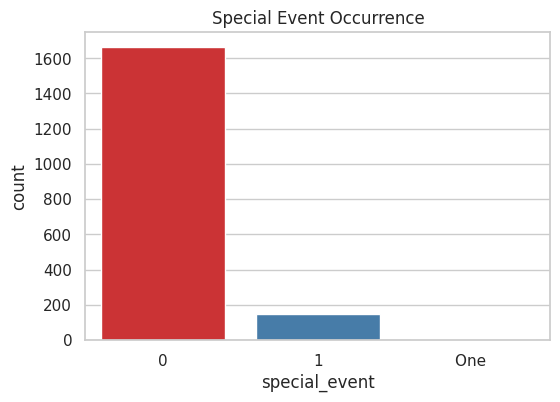

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='special_event',
    hue='special_event',
    data=df,
    palette='Set1',
    legend=False
)
plt.title("Special Event Occurrence")
plt.show()

**[ Correlation Analysis.](https://)**

**Now we Will perform correlation matrix using Heatmap.**

In [ ]:
numeric_df = df.select_dtypes(include='number')

In [ ]:
corr_matrix = numeric_df.corr()

**Heatmaping**

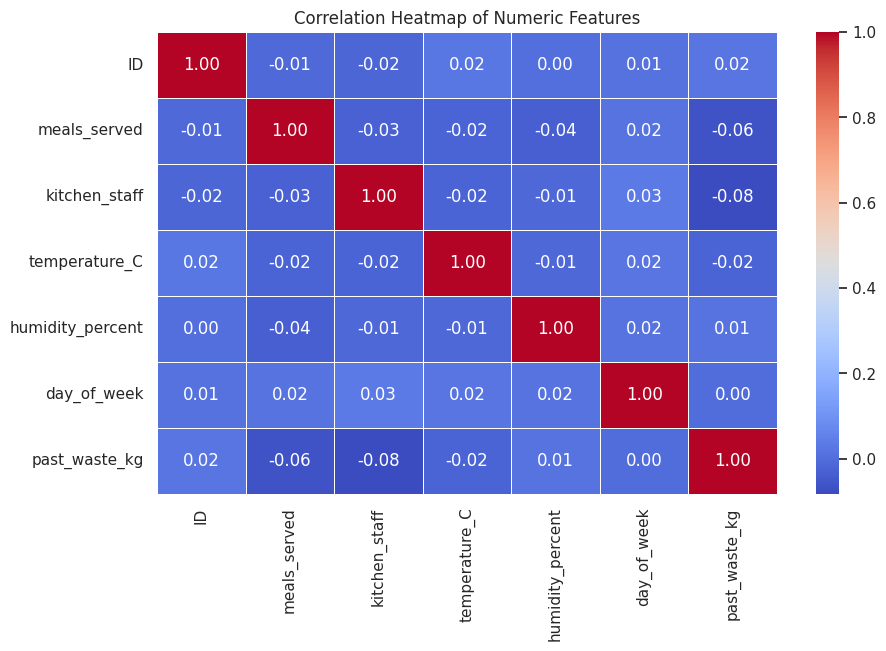

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Is there a correlation between the number of meals served and the amount of food waste**

In [ ]:
correlation = df['meals_served'].corr(df['past_waste_kg'])
print(f"Correlation between meals_served and past_waste_kg: {correlation:.2f}")

Correlation between meals_served and past_waste_kg: -0.06


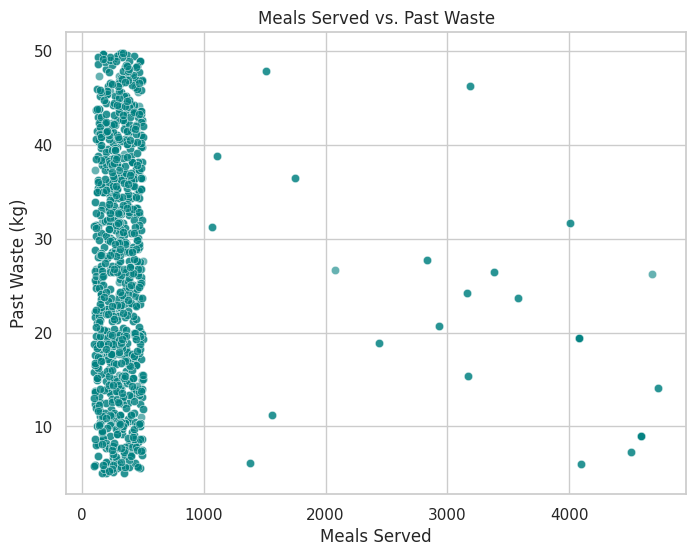

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='meals_served', y='past_waste_kg', data=df, alpha=0.6, color='teal')
plt.title("Meals Served vs. Past Waste")
plt.xlabel("Meals Served")
plt.ylabel("Past Waste (kg)")
plt.show()

**Hypothesis Testing**

In [ ]:
df['staff_level'] = pd.cut(df['kitchen_staff'], bins=[0, 9, 14, df['kitchen_staff'].max()],
                           labels=['Low', 'Medium', 'High'])

In [ ]:
low = df[df['staff_level'] == 'Low']['past_waste_kg']
medium = df[df['staff_level'] == 'Medium']['past_waste_kg']
high = df[df['staff_level'] == 'High']['past_waste_kg']

In [ ]:
f_stat, p_val = f_oneway(low, medium, high)

print("ANOVA Test - Kitchen Staff vs Food Waste")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

ANOVA Test - Kitchen Staff vs Food Waste
F-statistic: 3.68
P-value: 0.0254


**Separate waste for event and non-event days**

In [ ]:
event_waste = df[df['special_event'] == 1]['past_waste_kg']
non_event_waste = df[df['special_event'] == 0]['past_waste_kg']

**Performing T test**

In [ ]:
t_stat, p_val = ttest_ind(event_waste, non_event_waste, equal_var=False)

print("\nT-test - Special Event vs Food Waste")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")


T-test - Special Event vs Food Waste
T-statistic: nan
P-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


**Bar Plots for Waste by Experience and Category**

<ipython-input-88-658251459045>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='staff_experience', y='past_waste_kg', data=df, estimator='mean', ci=None)


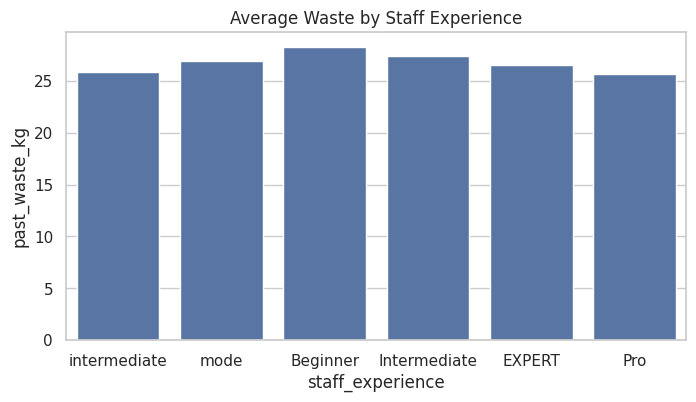

<ipython-input-88-658251459045>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='waste_category', y='past_waste_kg', data=df, estimator='mean', ci=None)


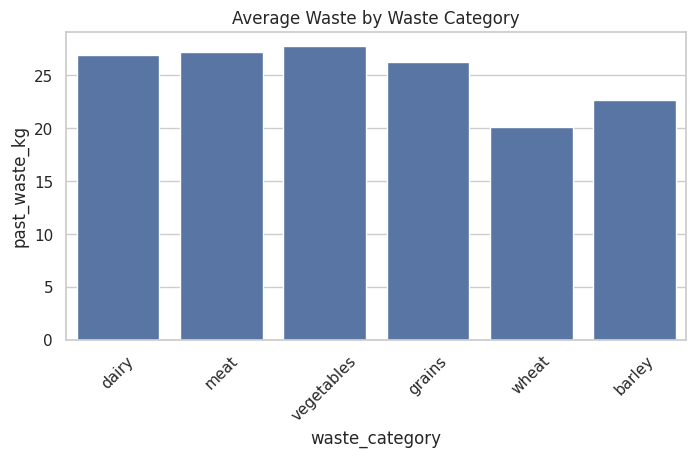

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='staff_experience', y='past_waste_kg', data=df, estimator='mean', ci=None)
plt.title("Average Waste by Staff Experience")
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='waste_category', y='past_waste_kg', data=df, estimator='mean', ci=None)
plt.title("Average Waste by Waste Category")
plt.xticks(rotation=45)
plt.show()

**Fetching Clean Data Set.**

In [ ]:
from google.colab import files
df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>